# 00 Exploratory Data Analisis (EDA) for metadata isic archive

## Import dependences

In [27]:
import polars as pl # for better performance in dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from tqdm import tqdm

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["savefig.dpi"] = 300

## Load data

In [28]:
METADATA_PATH = '../data/isic-archive/metadata.csv'
df = pl.read_csv(METADATA_PATH)

## EDA

### Initial exploration

In [29]:
df.head()

isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_5,diagnosis_confirm_type,family_hx_mm,fitzpatrick_skin_type,image_manipulation,image_type,lesion_id,mel_mitotic_index,mel_thick_mm,mel_ulcer,melanocytic,patient_id,personal_hx_mm,pixels_x,pixels_y,rcm_case_id,sex,tbp_tile_type
str,str,str,str,i64,str,str,str,bool,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,str,i64,i64,str,str,str
"""ISIC_0000000""","""Anonymous""","""CC-0""",null,55,"""anterior torso""",null,null,false,null,"""Benign""","""Benign melanocytic proliferati…","""Nevus""","""Nevus, Atypical, Dysplastic, o…","""Nevus, Dysplastic""",null,null,null,null,"""dermoscopic""",null,null,null,null,true,null,null,1022,767,null,"""female""",null
"""ISIC_0000001""","""Anonymous""","""CC-0""",null,30,"""anterior torso""",null,null,false,null,"""Benign""","""Benign melanocytic proliferati…","""Nevus""","""Nevus, Atypical, Dysplastic, o…","""Nevus, Dysplastic""",null,null,null,null,"""dermoscopic""",null,null,null,null,true,null,null,1022,767,null,"""female""",null
"""ISIC_0000002""","""Anonymous""","""CC-0""",null,60,"""upper extremity""",null,null,true,null,"""Malignant""","""Malignant melanocytic prolifer…","""Melanoma, NOS""",null,null,"""histopathology""",null,null,null,"""dermoscopic""",null,null,null,null,true,null,null,1022,767,null,"""female""",null
"""ISIC_0000003""","""Anonymous""","""CC-0""",null,30,"""upper extremity""",null,null,false,null,"""Benign""","""Benign melanocytic proliferati…","""Nevus""","""Nevus, Atypical, Dysplastic, o…","""Nevus, Dysplastic""",null,null,null,null,"""dermoscopic""",null,null,null,null,true,null,null,1022,767,null,"""male""",null
"""ISIC_0000004""","""Anonymous""","""CC-0""",null,80,"""posterior torso""",null,null,true,null,"""Malignant""","""Malignant melanocytic prolifer…","""Melanoma, NOS""",null,null,"""histopathology""",null,null,null,"""dermoscopic""",null,null,null,null,true,null,null,1022,767,null,"""male""",null


In [30]:
df.shape

(549590, 32)

In [31]:
df.columns

['isic_id',
 'attribution',
 'copyright_license',
 'acquisition_day',
 'age_approx',
 'anatom_site_general',
 'anatom_site_special',
 'clin_size_long_diam_mm',
 'concomitant_biopsy',
 'dermoscopic_type',
 'diagnosis_1',
 'diagnosis_2',
 'diagnosis_3',
 'diagnosis_4',
 'diagnosis_5',
 'diagnosis_confirm_type',
 'family_hx_mm',
 'fitzpatrick_skin_type',
 'image_manipulation',
 'image_type',
 'lesion_id',
 'mel_mitotic_index',
 'mel_thick_mm',
 'mel_ulcer',
 'melanocytic',
 'patient_id',
 'personal_hx_mm',
 'pixels_x',
 'pixels_y',
 'rcm_case_id',
 'sex',
 'tbp_tile_type']

In [32]:
interested_columns = [
    'isic_id',
    'lesion_id',
    'patient_id',
    'age_approx',
    'anatom_site_general',
    'anatom_site_special',
    'clin_size_long_diam_mm',
    'fitzpatrick_skin_type',
    'image_type',
    'personal_hx_mm',
    'sex',
    'melanocytic',
    'diagnosis_1']

df_selected = df.select(interested_columns)
df_selected.head()

isic_id,lesion_id,patient_id,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,fitzpatrick_skin_type,image_type,personal_hx_mm,sex,melanocytic,diagnosis_1
str,str,str,i64,str,str,str,str,str,str,str,bool,str
"""ISIC_0000000""",null,null,55,"""anterior torso""",null,null,null,"""dermoscopic""",null,"""female""",true,"""Benign"""
"""ISIC_0000001""",null,null,30,"""anterior torso""",null,null,null,"""dermoscopic""",null,"""female""",true,"""Benign"""
"""ISIC_0000002""",null,null,60,"""upper extremity""",null,null,null,"""dermoscopic""",null,"""female""",true,"""Malignant"""
"""ISIC_0000003""",null,null,30,"""upper extremity""",null,null,null,"""dermoscopic""",null,"""male""",true,"""Benign"""
"""ISIC_0000004""",null,null,80,"""posterior torso""",null,null,null,"""dermoscopic""",null,"""male""",true,"""Malignant"""


### Define objective target

In [33]:
df_selected = df_selected.with_columns(
    pl.when(pl.col('melanocytic').is_not_null() & pl.col('melanocytic'))
      .then(pl.lit('melanocytic'))
      .otherwise(pl.lit('non-melanocytic'))
      .alias('melanocytic_str')
)

df_selected = df_selected.with_columns(
    (pl.col('diagnosis_1') + "-" + pl.col('melanocytic_str').cast(pl.Utf8)).alias('target')
)

df_selected.head()

isic_id,lesion_id,patient_id,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,fitzpatrick_skin_type,image_type,personal_hx_mm,sex,melanocytic,diagnosis_1,melanocytic_str,target
str,str,str,i64,str,str,str,str,str,str,str,bool,str,str,str
"""ISIC_0000000""",null,null,55,"""anterior torso""",null,null,null,"""dermoscopic""",null,"""female""",true,"""Benign""","""melanocytic""","""Benign-melanocytic"""
"""ISIC_0000001""",null,null,30,"""anterior torso""",null,null,null,"""dermoscopic""",null,"""female""",true,"""Benign""","""melanocytic""","""Benign-melanocytic"""
"""ISIC_0000002""",null,null,60,"""upper extremity""",null,null,null,"""dermoscopic""",null,"""female""",true,"""Malignant""","""melanocytic""","""Malignant-melanocytic"""
"""ISIC_0000003""",null,null,30,"""upper extremity""",null,null,null,"""dermoscopic""",null,"""male""",true,"""Benign""","""melanocytic""","""Benign-melanocytic"""
"""ISIC_0000004""",null,null,80,"""posterior torso""",null,null,null,"""dermoscopic""",null,"""male""",true,"""Malignant""","""melanocytic""","""Malignant-melanocytic"""


In [34]:
print(df_selected['target'].value_counts())

shape: (7, 2)
┌───────────────────────────────┬────────┐
│ target                        ┆ count  │
│ ---                           ┆ ---    │
│ str                           ┆ u32    │
╞═══════════════════════════════╪════════╡
│ null                          ┆ 19527  │
│ Malignant-melanocytic         ┆ 10619  │
│ Benign-non-melanocytic        ┆ 450772 │
│ Malignant-non-melanocytic     ┆ 16465  │
│ Benign-melanocytic            ┆ 48893  │
│ Indeterminate-melanocytic     ┆ 395    │
│ Indeterminate-non-melanocytic ┆ 2919   │
└───────────────────────────────┴────────┘


In [35]:
interest_targets = ['Malignant-melanocytic', 'Benign-melanocytic', 'Benign-non-melanocytic', 'Malignant-non-melanocytic']

In [36]:
mask = pl.col('target').is_in(interest_targets)
df_selected = df_selected.filter(mask)

print(df_selected['target'].value_counts())

shape: (4, 2)
┌───────────────────────────┬────────┐
│ target                    ┆ count  │
│ ---                       ┆ ---    │
│ str                       ┆ u32    │
╞═══════════════════════════╪════════╡
│ Malignant-melanocytic     ┆ 10619  │
│ Benign-non-melanocytic    ┆ 450772 │
│ Benign-melanocytic        ┆ 48893  │
│ Malignant-non-melanocytic ┆ 16465  │
└───────────────────────────┴────────┘


### Detect null values

In [37]:
#count missing values per column
missing_counts = df_selected.null_count()
missing_counts

isic_id,lesion_id,patient_id,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,fitzpatrick_skin_type,image_type,personal_hx_mm,sex,melanocytic,diagnosis_1,melanocytic_str,target
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,409158,55439,17129,39010,522596,120638,516628,1,508655,26093,450045,0,0,0


In [38]:
df_selected = df_selected.filter(pl.col('melanocytic').is_not_null())

In [39]:
df_selected = df_selected.drop(['lesion_id', 
                                        'patient_id',
                                        'anatom_site_special',
                                        'clin_size_long_diam_mm',
                                        'fitzpatrick_skin_type',
                                        'image_type',
                                        'personal_hx_mm',
                                        'melanocytic',
                                        'diagnosis_1',
                                        'melanocytic_str'])

In [40]:
df_selected.shape

(76704, 5)

In [41]:
missing_counts = df_selected.null_count()
missing_counts

isic_id,age_approx,anatom_site_general,sex,target
u32,u32,u32,u32,u32
0,14221,29636,14074,0


### Imputation data for sex and age columns

In [42]:
classes = df_selected['target'].unique().to_list()
classes

['Benign-non-melanocytic',
 'Malignant-non-melanocytic',
 'Benign-melanocytic',
 'Malignant-melanocytic']

In [43]:
for class_name in classes:
    dfx = df_selected.filter(pl.col('target') == class_name)
    
    age_mode = dfx['age_approx'].drop_nulls().mode()[0]
    sex_mode = dfx['sex'].drop_nulls().mode()[0]
    
    print(f"Class: {class_name}, Age Mode: {age_mode}, Sex Mode: {sex_mode}")

    df_selected = df_selected.with_columns(
        pl.when(pl.col('target') == class_name)
        .then(pl.col('age_approx').fill_null(age_mode))
        .otherwise(pl.col('age_approx'))
        .alias('age_approx')
    )

    df_selected = df_selected.with_columns(
        pl.when(pl.col('target') == class_name)
        .then(pl.col('sex').fill_null(sex_mode))
        .otherwise(pl.col('sex'))
        .alias('sex')
    )

Class: Benign-non-melanocytic, Age Mode: 70, Sex Mode: male
Class: Malignant-non-melanocytic, Age Mode: 85, Sex Mode: male
Class: Benign-melanocytic, Age Mode: 15, Sex Mode: male
Class: Malignant-melanocytic, Age Mode: 70, Sex Mode: male


In [44]:
missing_counts = df_selected.null_count()
missing_counts

isic_id,age_approx,anatom_site_general,sex,target
u32,u32,u32,u32,u32
0,0,29636,0,0


### Imput new class for null values in anatom site general

In [45]:
df_selected = df_selected.with_columns(
    pl.col("anatom_site_general").fill_null("unknown")
)

In [46]:
missing_counts = df_selected.null_count()
missing_counts

isic_id,age_approx,anatom_site_general,sex,target
u32,u32,u32,u32,u32
0,0,0,0,0


### Transform anatom_site_general column to one hot encoding format

In [47]:
#rename comuln
df_selected = df_selected.rename({"anatom_site_general": "anatom_site"})

In [48]:
df_selected = df_selected.to_dummies("anatom_site")

In [49]:
df_selected.head()

isic_id,age_approx,anatom_site_anterior torso,anatom_site_head/neck,anatom_site_lateral torso,anatom_site_lower extremity,anatom_site_oral/genital,anatom_site_palms/soles,anatom_site_posterior torso,anatom_site_unknown,anatom_site_upper extremity,sex,target
str,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,str,str
"""ISIC_0000000""",55,1,0,0,0,0,0,0,0,0,"""female""","""Benign-melanocytic"""
"""ISIC_0000001""",30,1,0,0,0,0,0,0,0,0,"""female""","""Benign-melanocytic"""
"""ISIC_0000002""",60,0,0,0,0,0,0,0,0,1,"""female""","""Malignant-melanocytic"""
"""ISIC_0000003""",30,0,0,0,0,0,0,0,0,1,"""male""","""Benign-melanocytic"""
"""ISIC_0000004""",80,0,0,0,0,0,0,1,0,0,"""male""","""Malignant-melanocytic"""


## Extract selected images

In [50]:
source_dir = "../data/isic-archive/images"
dest_dir = "../data/isic-archive/images_selected"

In [51]:
os.makedirs(dest_dir, exist_ok=True)
print(f"Destination directory ready: {dest_dir}")

Destination directory ready: ../data/isic-archive/images_selected


In [52]:
image_ids = df_selected.to_pandas()['isic_id'].tolist()

In [53]:
not_found_count = 0
not_found_list = []

for img_id in tqdm(image_ids, desc="Copying"):
    filename = f"{img_id}.jpg"
    src_path = os.path.join(source_dir, filename)
    dst_path = os.path.join(dest_dir, filename)
    
    if os.path.exists(src_path):
        shutil.copy2(src_path, dst_path)
    else:
        not_found_count += 1
        not_found_list.append(img_id)

print("-" * 30)
print("Process completed.")
print(f"Successfully copied: {len(image_ids) - not_found_count}")

if not_found_count > 0:
    print(f"Warning: {not_found_count} images were not found in the source folder.")

Copying: 100%|██████████| 76704/76704 [01:10<00:00, 1091.48it/s]

------------------------------
Process completed.
Successfully copied: 74265


In [55]:
df_final = df_selected.filter(~pl.col('isic_id').is_in(not_found_list))
df_final.shape

(74265, 13)

## Plot data distribution

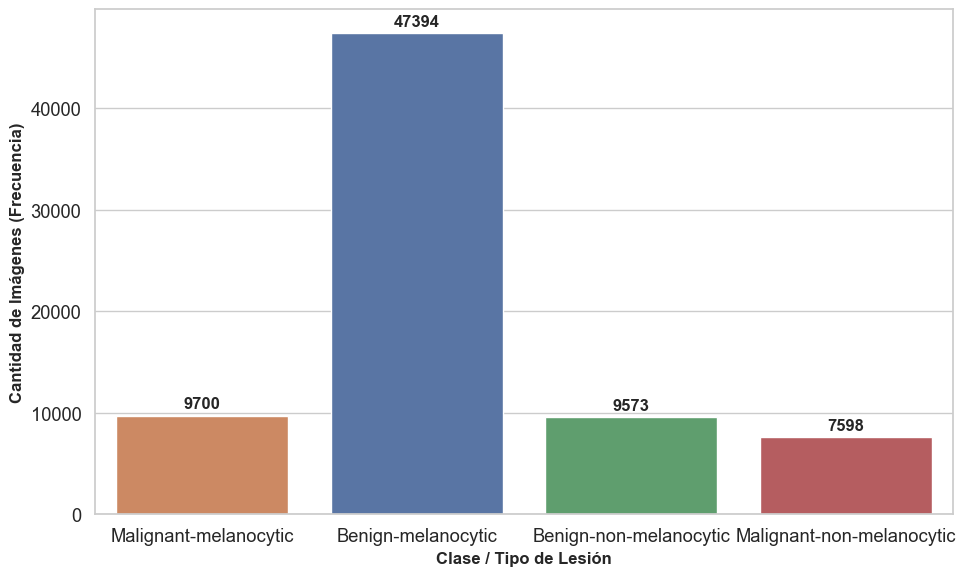

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 1. Asignamos el gráfico a una variable 'ax'
ax = sns.countplot(
    data=df_final.to_pandas(), 
    x='target', 
    order=interest_targets, 
    hue='target',
    legend=False # Opcional: ocultamos la leyenda lateral si ya tenemos etiquetas abajo
)

# 2. Magia: Iteramos sobre los contenedores para poner las etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12, fontweight='bold')

plt.xlabel('Clase / Tipo de Lesión', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Imágenes (Frecuencia)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()